# Momentum 

Standard gradient descent. 

epoch 20, x1 -0.943467, x2 -0.000073


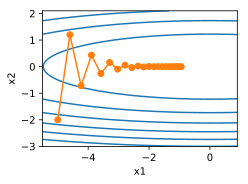

In [17]:
%matplotlib inline
import d2l
import math
from mxnet import nd

eta = 0.4

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0)

d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

Momentum

epoch 20, x1 -0.062843, x2 0.001202


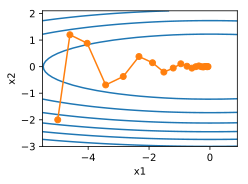

In [18]:
def momentum_2d(x1, x2, v1, v2):
    v1 = gamma * v1 + eta * 0.2 * x1
    v2 = gamma * v2 + eta * 4 * x2
    return x1 - v1, x2 - v2, v1, v2

eta, gamma = 0.4, 0.5
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

GD with a large learning rate

epoch 20, x1 -0.387814, x2 -1673.365109


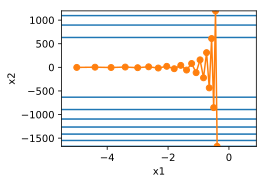

In [19]:
eta = 0.6
d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

Same learning rate for momentum. 

epoch 20, x1 0.007188, x2 0.002553


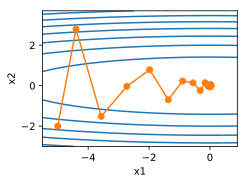

In [20]:
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

# Adagrad

epoch 20, x1 -2.382563, x2 -0.158591


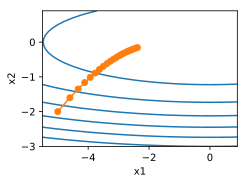

In [21]:
def adagrad_2d(x1, x2, s1, s2):
    # The first two terms are the independent variable gradients
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    s1 += g1 ** 2
    s2 += g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

eta = 0.4
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

Use a much larger learning rate.

epoch 20, x1 -0.002295, x2 -0.000000


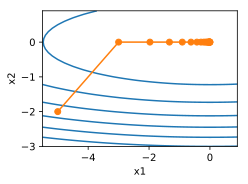

In [22]:
eta = 2
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

# RMSProp

epoch 20, x1 -0.010599, x2 0.000000


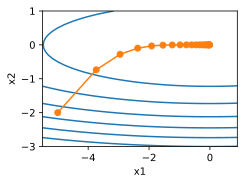

In [23]:
def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    s1 = gamma * s1 + (1 - gamma) * g1 ** 2
    s2 = gamma * s2 + (1 - gamma) * g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2


eta, gamma = 0.4, 0.9
d2l.show_trace_2d(f_2d, d2l.train_2d(rmsprop_2d))